# Language Trend Analysis

Stack Overflow discussions reveal which programming languages developers are most interested in over time.  
In this project, I’ll analyze Stack Overflow data from 2008 onward to discover how language popularity has evolved, using Pandas for analysis and Matplotlib for visualization.


In [2]:
# Connect Google Colab to your Google Drive to access project files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Getting the Data
Monthly Stack Overflow post counts for popular programming languages, those are fetched using an SQL query. The results are saved as a CSV file in the Drive folder LanguageTrendAnalysis for analysis.

In [3]:
import pandas as pd

# File path in Drive
file_path = "/content/drive/My Drive/LanguageTrendAnalysis/QueryResults.csv"

# Load CSV into DataFrame
df = pd.read_csv(file_path)

# Quick look at the data
df.head()


,m,TagName,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


## 2. Preparing the Data
The CSV is loaded into Pandas, and the date column is converted to a datetime format. This ensures proper handling for time series analysis. Missing values are checked and filled with 0 where necessary.

In [4]:
# Convert date column to datetime
df['m'] = pd.to_datetime(df['m'])

# Check for missing values
df.isna().sum()

# Fill missing post counts with 0
df['Posts'] = df['Posts'].fillna(0)

# Quick peek
df.head()

,m,TagName,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164


In [5]:
# Pivot data: rows = months, columns = languages, values = post counts
reshaped_df = df.pivot(index='m', columns='TagName', values='Posts')

# Fill any remaining missing values with 0
reshaped_df = reshaped_df.fillna(0)

# Quick check
reshaped_df.head()


TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1153.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


## 3. Visualizing a single language trend
This step plots monthly posts for one programming language to see its popularity over time.

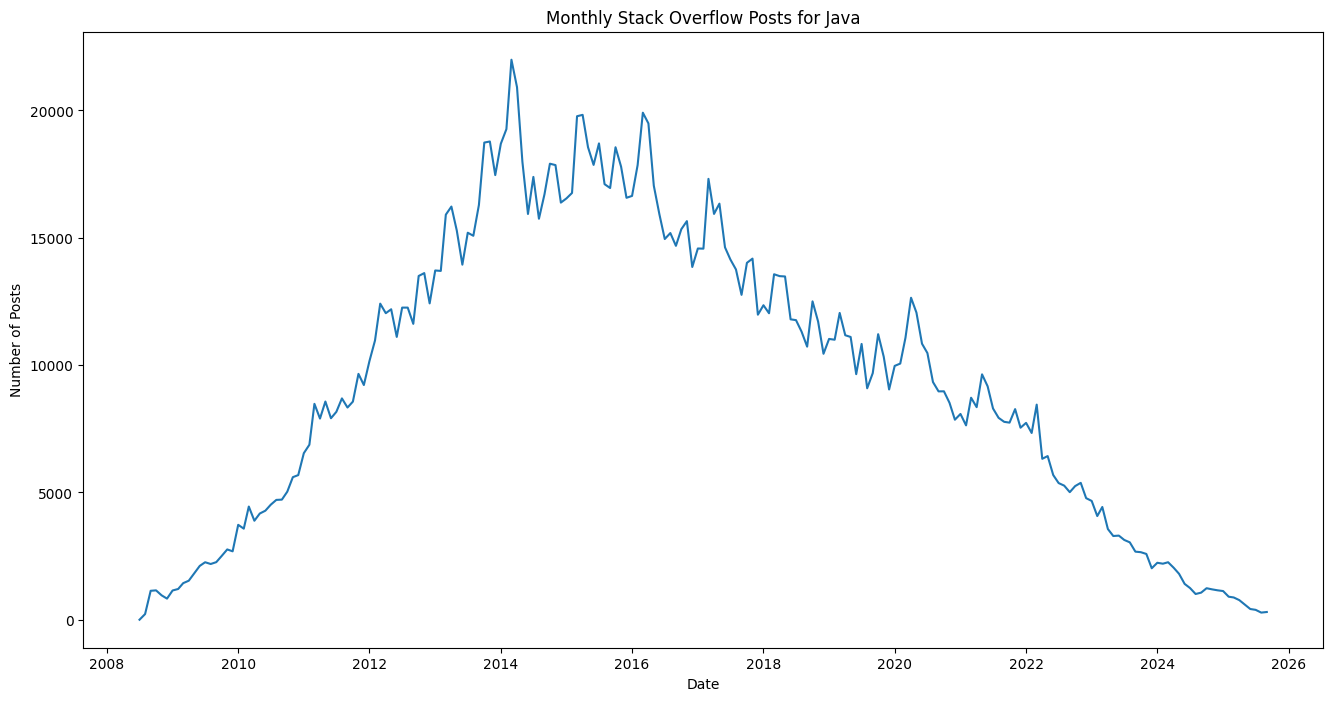

In [6]:
import matplotlib.pyplot as plt

# Plot Java posts over time
plt.figure(figsize=(16,8))
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Monthly Stack Overflow Posts for Java')
plt.show()


The line graph shows monthly Stack Overflow posts for Java from 2008–2025. Posts grew steadily until peaking around 2014 (~22–23k per month), then gradually declined, showing long-term shifts in Java’s popularity.

## 4. Data Cleaning & Formatting

- Convert the m column to datetime for easier handling.
- Fill any missing post counts with 0 to avoid gaps in analysis.

In [7]:
# Convert date column
df['m'] = pd.to_datetime(df['m'])

# Pivot to get languages as columns
reshaped_df = df.pivot(index='m', columns='TagName', values='Posts')

# Fill missing values
reshaped_df.fillna(0, inplace=True)

# Ensure index is datetime for plotting
reshaped_df.index = pd.to_datetime(reshaped_df.index)

# Quick look
reshaped_df.head()


TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1153.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


## 5. Reshaping Data for Analysis
Pivot the dataframe so each programming language becomes a separate column, indexed by month. This structure makes it easy to compare languages and plot trends over time.

In [8]:
reshaped_df = df.pivot(index='m', columns='TagName', values='Posts')
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()


TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1153.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


Data is reshaped so each programming language has its own column, indexed by month. Missing values are filled with 0 to ensure complete time series for analysis and plotting.

## 6. Comparing All Language Trends

Now that each language’s monthly post counts are ready, I’m plotting all of them together in a single graph.
This helps visualize how developer interest has shifted across languages over time.

Index sample: DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01'], dtype='datetime64[ns]', name='m', freq=None)
Index dtype: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Columns: ['assembly', 'c', 'c#', 'c++', 'delphi', 'go']
Dtypes (first 6):
 TagName
assembly    float64
c           float64
c#          float64
c++         float64
delphi      float64
go          float64
dtype: object


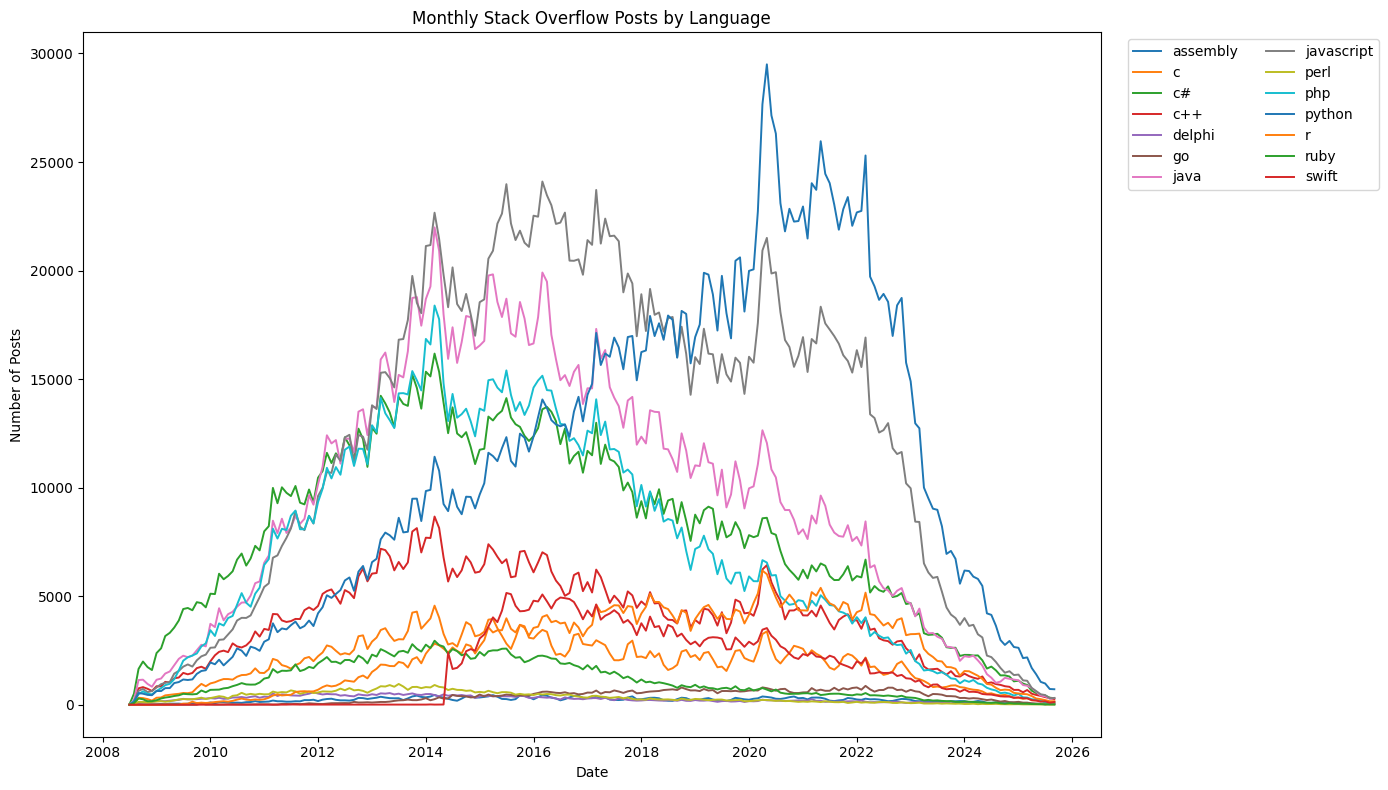

In [10]:
# --- quick checks (run once) ---
print("Index sample:", reshaped_df.index[:3])
print("Index dtype:", type(reshaped_df.index[0]))
print("Columns:", list(reshaped_df.columns)[:6])
print("Dtypes (first 6):\n", reshaped_df.dtypes[:6])

# --- ensure correct types ---
reshaped_df.index = pd.to_datetime(reshaped_df.index, errors='coerce')
reshaped_df = reshaped_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# --- final multi-line plot ---
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

for col in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[col], linewidth=1.4, label=col)

plt.title('Monthly Stack Overflow Posts by Language')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(ncol=2, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



## 7. Analyzing Overall Stack Overflow Activity

To understand the overall trend of developer activity on Stack Overflow, I’m now summing up all language posts per month and plotting them.
This shows the total number of questions posted across all languages revealing how the platform’s engagement changed over time.

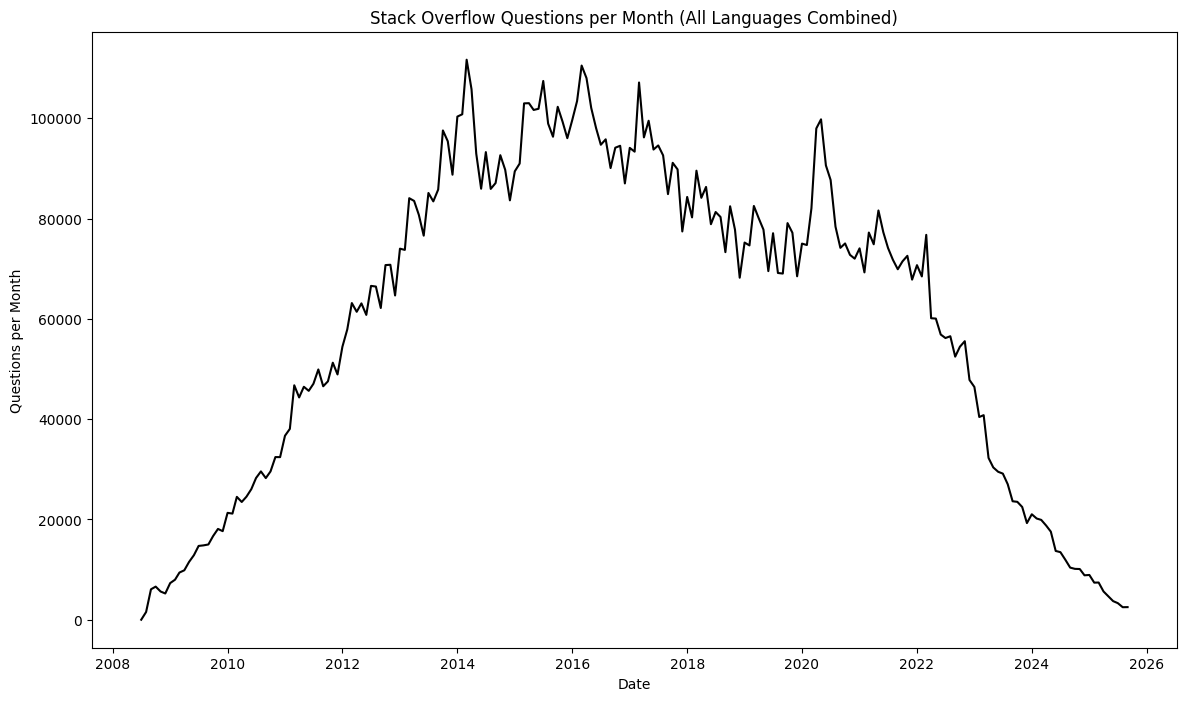

In [11]:
# Calculate total posts per month
reshaped_df["Total"] = reshaped_df.sum(axis=1)

# Plot overall trend
plt.figure(figsize=(14,8))
plt.plot(reshaped_df.index, reshaped_df["Total"], color='black')
plt.title("Stack Overflow Questions per Month (All Languages Combined)")
plt.xlabel("Date")
plt.ylabel("Questions per Month")
plt.show()

The final graph shows overall developer activity trends on Stack Overflow rising sharply until around 2014-2021, then slowly declining, reflecting shifts in how developers learn and share knowledge online

## 8. Conclusion
Python’s rapid growth after 2020 and Stack Overflow’s overall peak around 2014-2021 reflect major shifts in developer focus from traditional languages to data science and automation.